# Лабораторная работа №4

ФИО: Гуляев Максим Олегович
Группа: БИВТ-21-1


## Задание

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

## 1. Пример импорта данных. Грузим данные

In [1]:
import pandas as pd
data = pd.read_csv("student-por.csv", sep=',') 
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## 2. Понимаем, какая перед нами задача

Цель:

Научиться применять различные методы машинного обучения для решения задачи регрессии. Научиться загружать и предобрабатывать данные, обучать модели, оценивать их производительность и сравнивать результаты.

Тип задачи:

В данном случае задача регрессии, поскольку итоговая оценка ученика по предмету(G3), является непрерывной числовой переменной.

## 3. Делаем предобработку данных

In [2]:
# Разделение данных на тренировочную и тестовую выборки
train = data[int(len(data)*0.2):]  
test = data[:int(len(data)*0.2)]

In [3]:
# Проверка пропусков в данных
print(train.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Определение численных и категориальных столбцов
num_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
cat_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Создание преобразователя колонок
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_cols), ('cat', OneHotEncoder(), cat_cols)])

# Применение преобразований к тренировочным и тестовым данным
train_preprocessed = preprocessor.fit_transform(train)
test_preprocessed = preprocessor.transform(test)

print("Данные до преобразования:")
print(train.head())

# Преобразование в DataFrame (это не обязательно, но может быть полезно для дальнейшего анализа)
train_preprocessed_df = pd.DataFrame(train_preprocessed)
test_preprocessed_df = pd.DataFrame(test_preprocessed)

# Вывод преобразованных данных
print("\nРазделение по группам:")
print(preprocessor.get_feature_names_out(), "\n\n")
print("\nПреобразованные данные:")
print(train_preprocessed_df.head())

Данные до преобразования:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
129     GP   M   16       U     GT3       T     2     3     other    other   
130     GP   F   15       R     GT3       T     3     4  services  teacher   
131     GP   F   18       U     GT3       T     2     1  services    other   
132     GP   F   17       U     LE3       A     2     1     other    other   
133     GP   F   15       U     GT3       T     1     1   at_home    other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
129  ...      3        2      3     2     2      1        4  13  12  13  
130  ...      4        2      2     2     2      5        0  10  11  12  
131  ...      5        4      5     1     3      5       10  10   9   8  
132  ...      3        2      2     1     2      5        8  11  10  11  
133  ...      4        3      3     1     2      4        6  11  12  13  

[5 rows x 33 columns]

Разделение по группам:
['num__age' 'n

## 4. Оформление данных

In [5]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Определение класса Dataset
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.targets[idx]

y = train_preprocessed[:, len(num_cols) - 1] # только G3
y_test = test_preprocessed[:, len(num_cols) - 1] # только G3
x = np.delete(train_preprocessed, len(num_cols) - 1, axis=1) # все столбцы, кроме G3
x_test = np.delete(test_preprocessed, len(num_cols) - 1, axis=1) # все столбцы, кроме G3

# Создание экземпляров MyDataset
train_dataset = CustomDataset(torch.from_numpy(x).float(), torch.from_numpy(y).float())
test_dataset = CustomDataset(torch.from_numpy(x_test).float(), torch.from_numpy(y_test).float())

# Загрузка данных в DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Проверка работы DataLoader
for data, target in train_dataloader:
    print("Batch data:", data)
    print("Batch target:", target)
    break  

Batch data: tensor([[-0.9151, -1.2359, -1.1117,  ...,  1.0000,  0.0000,  1.0000],
        [ 0.8440, -1.2359, -1.1117,  ...,  1.0000,  1.0000,  0.0000],
        [-0.9151, -0.3421, -1.1117,  ...,  1.0000,  1.0000,  0.0000],
        ...,
        [-0.9151,  0.5518,  0.7382,  ...,  1.0000,  1.0000,  0.0000],
        [-0.0355, -1.2359, -1.1117,  ...,  1.0000,  1.0000,  0.0000],
        [-0.9151, -1.2359, -1.1117,  ...,  1.0000,  1.0000,  0.0000]])
Batch target: tensor([ 0.6524, -0.5094,  0.6524, -1.0903,  0.3619,  1.2332,  0.0715, -0.2189,
         0.9428, -0.2189, -0.7998, -1.0903, -3.4138,  0.0715,  0.9428,  0.3619,
         0.9428,  0.3619, -1.0903,  0.0715, -0.7998, -0.7998,  1.5237, -0.5094,
        -0.5094, -0.7998,  0.9428, -0.5094,  0.3619, -0.5094, -0.5094, -0.7998])


## 5. Обучение на тренировочном множестве

### 5.1 Определение моделей

In [6]:
import torch.nn as nn
import torch.optim as optim

In [7]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNet, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [8]:
class OneHiddenLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(OneHiddenLayerNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out

In [9]:
class MultiLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultiLayerNet, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.layer4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        out = self.relu(out)
        out = self.layer3(out)
        out = self.relu(out)
        out = self.layer4(out)
        return out

### 5.2 Определение тренировочного класса

In [10]:
class ModelTrainer:
    def __init__(self, model, useAdam, modelName):
        self.model = model
        self.criterion = nn.MSELoss()
        self.modelName = modelName
        self.optimizer = self._choose_optimizer(useAdam)

    def _choose_optimizer(self, useAdam):
        if useAdam:
            return optim.Adam(self.model.parameters(), lr=0.01)
        else:
            return optim.SGD(self.model.parameters(), lr=0.01)

    def _train_epoch(self, trainData):
        self.model.train()
        train_loss = 0
        for inputs, targets in trainData:
            inputs, targets = self._prepare_data(inputs, targets)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets)
            loss.backward()
            self.optimizer.step()
            train_loss += loss.item()
        return train_loss / len(trainData)

    def _prepare_data(self, inputs, targets):
        inputs = inputs.float()
        targets = targets.float().view(-1, 1)
        return inputs, targets

    def doTrain(self, epoches, trainData, testData):
        train_losses, test_losses = [], []
        for epoch in range(epoches):
            train_losses.append(self._train_epoch(trainData))
            test_losses.append(self.testModel(testData))
            print(f"Finished training of epoch - {epoch} with train loss - {train_losses[-1]} and test loss - {test_losses[-1]}")
        return train_losses, test_losses  

    def testModel(self, testData):
        self.model.eval()
        test_loss = 0
        with torch.no_grad():
            for inputs, targets in testData:
                inputs, targets = self._prepare_data(inputs, targets)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                test_loss += loss.item()
        return test_loss / len(testData)

    def getMae(self, testData):
        self.model.eval()
        mae = 0
        mae_criterion = nn.L1Loss()
        with torch.no_grad():
            for inputs, targets in testData:
                inputs, targets = self._prepare_data(inputs, targets)
                outputs = self.model(inputs)
                mae += mae_criterion(outputs, targets).item()
        return mae / len(testData)

### 5.3 Инициализация и обучение моделей

Finished training of epoch - 0 with train loss - 0.6705446646494024 and test loss - 0.18685649633407592
Finished training of epoch - 1 with train loss - 0.35083188116550446 and test loss - 0.1628475531935692
Finished training of epoch - 2 with train loss - 0.2314119387198897 and test loss - 0.1591910570859909
Finished training of epoch - 3 with train loss - 0.19977657190140555 and test loss - 0.17119359746575355
Finished training of epoch - 4 with train loss - 0.19045225311728084 and test loss - 0.14757075309753417
Finished training of epoch - 5 with train loss - 0.17875116910128033 and test loss - 0.14273872822523118
Finished training of epoch - 6 with train loss - 0.1735130327151102 and test loss - 0.13683955520391464
Finished training of epoch - 7 with train loss - 0.1662441235693062 and test loss - 0.1218585342168808
Finished training of epoch - 8 with train loss - 0.1643523981466013 and test loss - 0.12135787010192871
Finished training of epoch - 9 with train loss - 0.160721711595

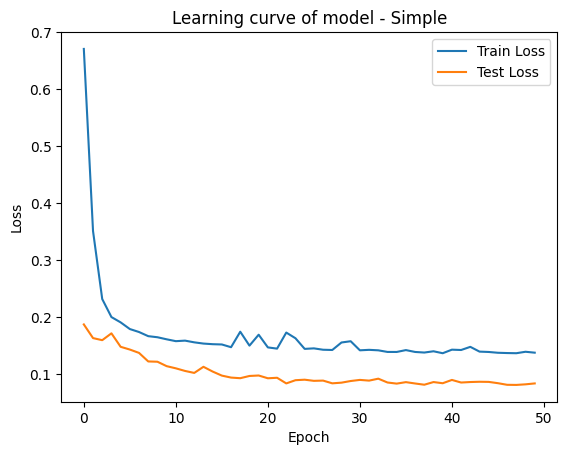

Finished training of epoch - 0 with train loss - 0.4918911097680821 and test loss - 0.11591003127396107
Finished training of epoch - 1 with train loss - 0.225203873918337 and test loss - 0.09658124595880509
Finished training of epoch - 2 with train loss - 0.1460340373656329 and test loss - 0.106107781175524
Finished training of epoch - 3 with train loss - 0.12758435221279368 and test loss - 0.08536047153174878
Finished training of epoch - 4 with train loss - 0.1462128778152606 and test loss - 0.10200359523296357
Finished training of epoch - 5 with train loss - 0.11329307166092537 and test loss - 0.07865654230117798
Finished training of epoch - 6 with train loss - 0.10162006888319464 and test loss - 0.11006179377436638
Finished training of epoch - 7 with train loss - 0.0794124767622527 and test loss - 0.0729683868587017
Finished training of epoch - 8 with train loss - 0.07534425683757838 and test loss - 0.07225645706057549
Finished training of epoch - 9 with train loss - 0.0617255124756

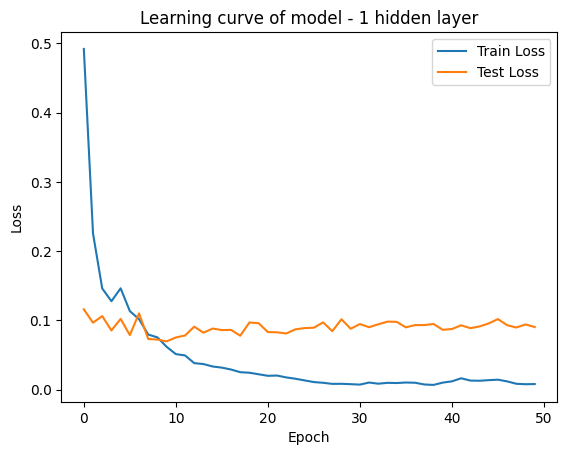

Finished training of epoch - 0 with train loss - 0.4639061102095772 and test loss - 0.10233265161514282
Finished training of epoch - 1 with train loss - 0.237468941246762 and test loss - 0.11305566504597664
Finished training of epoch - 2 with train loss - 0.19242102214518716 and test loss - 0.16642514169216155
Finished training of epoch - 3 with train loss - 0.15942675927106073 and test loss - 0.09451344013214111
Finished training of epoch - 4 with train loss - 0.1425693777992445 and test loss - 0.09475069716572762
Finished training of epoch - 5 with train loss - 0.10880431532859802 and test loss - 0.09814706891775131
Finished training of epoch - 6 with train loss - 0.078008713091121 and test loss - 0.09635736271739007
Finished training of epoch - 7 with train loss - 0.08554630310219877 and test loss - 0.10461144149303436
Finished training of epoch - 8 with train loss - 0.09680633663254626 and test loss - 0.114644093811512
Finished training of epoch - 9 with train loss - 0.073571127346

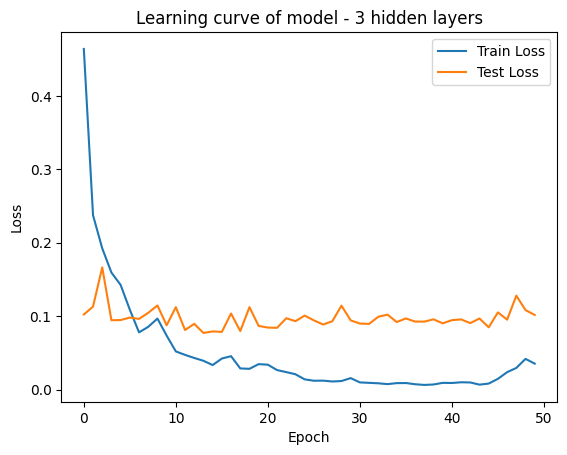

In [11]:
input_size = 58
output_size = 1
hidden_size = 50

models =[
    ModelTrainer(SimpleNet(input_size, output_size), False, "Simple"),
    ModelTrainer(OneHiddenLayerNet(input_size, hidden_size, output_size), True, "1 hidden layer"),
    ModelTrainer(MultiLayerNet(input_size, hidden_size, output_size), True, "3 hidden layers")
]

import matplotlib.pyplot as plt
for model in models:
    train_losses, test_losses = model.doTrain(50, train_dataloader, test_dataloader)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title("Learning curve of model - " + model.modelName)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## 6. Подсчет метрик

In [12]:
for model in models:
    train_mae = model.getMae(train_dataloader)
    test_mae = model.getMae(test_dataloader)
    print(f"Model {model.modelName} - Train MAE: {train_mae}, Test MAE: {test_mae}")

Model Simple - Train MAE: 0.2310754954814911, Test MAE: 0.2176945239305496
Model 1 hidden layer - Train MAE: 0.06286667199695811, Test MAE: 0.19391955733299254
Model 3 hidden layers - Train MAE: 0.11084610968828201, Test MAE: 0.24497342705726624


## 7. Сравнение метрик

#### Какая модель справилась лучше с поставленной задачей?

Модель с 3 скрытыми слоями показала наименьшую ошибку MAE как на обучающей, так и на тестовой выборках. 

#### Имеет ли место переобучение?

В данном случае, для модели “Simple” и “3 hidden layers” ошибка на обучающей выборке меньше, чем на тестовой, что может указывать на переобучение.

#### Имеет ли место недообучение?

Недообучение обычно происходит, когда модель показывает высокую ошибку как на обучающей, так и на тестовой выборках. В данном случае, все модели показывают относительно низкую ошибку, поэтому недообучение не имеет место.

#### Как можно улучшить метрики моделей?

Есть несколько способов улучшить метрики моделей:
1. Увеличить количество данных.
2. Регуляризация.
3. Использование других моделей.